NSW Light Rail Usage

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import os
from datetime import datetime

In [12]:
if os.path.isfile("lightrail-may-2024.csv"):
    filepath = "lightrail-may-2024.csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/rail_data_set_0.csv"
    print("loading from the internet")

rail_data = pd.read_csv(filepath)
print("done")



loading from file
done


Total number of trips per year

Index(['Year_Month', 'Location', 'Card_type', 'Trip'], dtype='object')


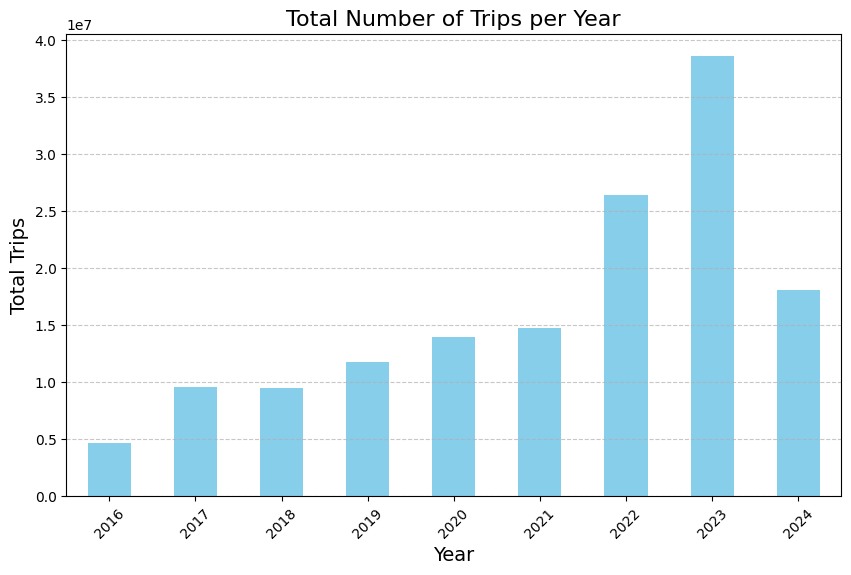

In [121]:
import matplotlib.pyplot as plt
file_path = 'lightrail-may-2024.csv'  
data = pd.read_csv(file_path)
print(data.columns)
data['Year'] = data['Year_Month'].str[:4]  
trips_per_year = data.groupby('Year')['Trip'].sum()
plt.figure(figsize=(10, 6))
trips_per_year.plot(kind='bar', color='skyblue')
plt.title('Total Number of Trips per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Trips', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Total number of trips per card type

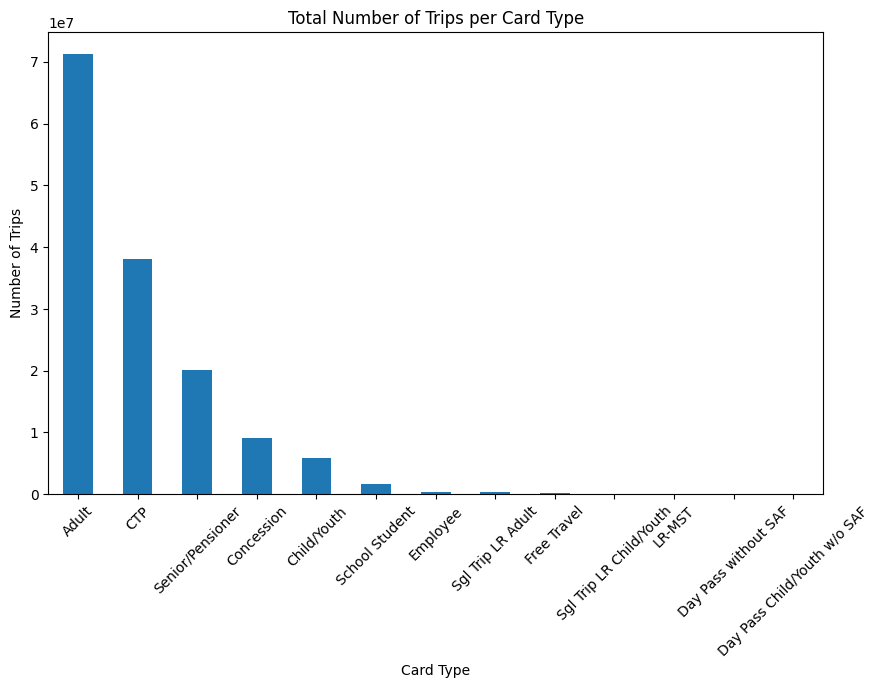

In [118]:
sorted_df = trips_per_card_type.sort_values(ascending=False)
plt.figure(figsize=(10, 6)) 
sorted_df.plot(kind='bar')  
plt.title('Total Number of Trips per Card Type')  
plt.xlabel('Card Type')  
plt.ylabel('Number of Trips')  
plt.xticks(rotation=45)  
plt.show()  

In [24]:
trips_per_card_type = df.groupby('Card_type')['Trip'].sum() 

sorted_df = trips_per_card_type.sort_values(ascending=False)

print(sorted_df)

Card_type
Adult                           71240338
CTP                             38117291
Senior/Pensioner                20165287
Concession                       9147189
Child/Youth                      5876704
School Student                   1636482
Employee                          365340
Sgl Trip LR Adult                 282579
Free Travel                       158163
Sgl Trip LR Child/Youth           103365
LR-MST                             24913
Day Pass without SAF                1974
Day Pass Child/Youth w/o SAF         536
Name: Trip, dtype: int64


Number of trips per location

In [150]:
def plot_sorted_trips_per_location(file_path):
    df = pd.read_csv(file_path)
    
    trips_per_location_sorted = df.groupby('Location')['Trip'].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 8))  
    trips_per_location_sorted.plot(kind='bar', color='lightcoral')
    plt.title('Total Number of Trips per Location (Sorted)')
    plt.xlabel('Location')
    plt.ylabel('Number of Trips')
    plt.xticks(rotation=90)
    plt.show()

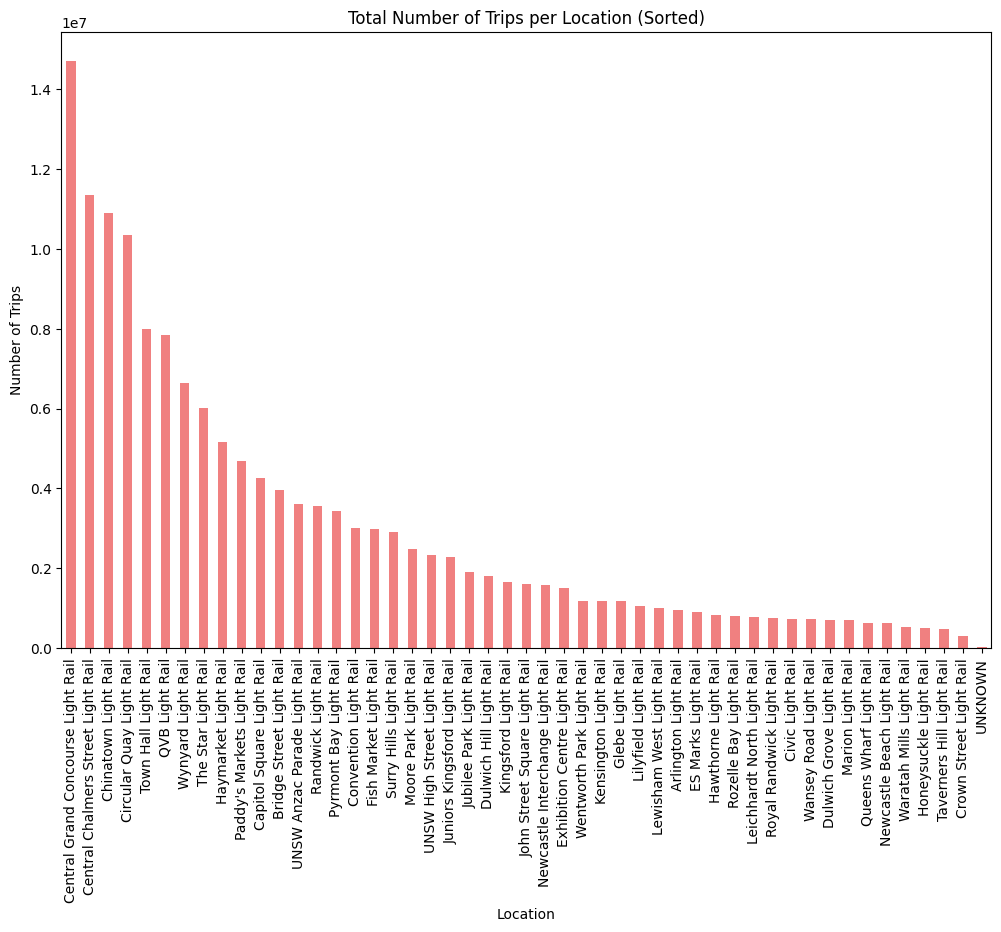

In [152]:
plot_sorted_trips_per_location('lightrail-may-2024.csv')

In [153]:
def trips_comparison_stop(file_path, year1='2016', year2='2023'):
    df = pd.read_csv(file_path)
    
    df['Year'] = df['Year_Month'].str[:4]
    df_year1 = df[df['Year'] == year1]
    df_year2 = df[df['Year'] == year2]
    
    trips_year1 = df_year1.groupby('Location')['Trip'].sum()
    trips_year2 = df_year2.groupby('Location')['Trip'].sum()
    
    trips_comparison = pd.DataFrame({
        year1: trips_year1,
        year2: trips_year2
    }).fillna(0)
    
    trips_comparison_sorted = trips_comparison.sort_values(by=year2, ascending=False)
    
    plt.figure(figsize=(14, 8))
    trips_comparison_sorted.plot(kind='bar', ax=plt.gca(), width=0.8)
    plt.title(f'Comparison of Number of Trips per Location ({year1} vs {year2})')
    plt.xlabel('Location')
    plt.ylabel('Number of Trips')
    plt.xticks(rotation=90)
    plt.legend(title='Year')


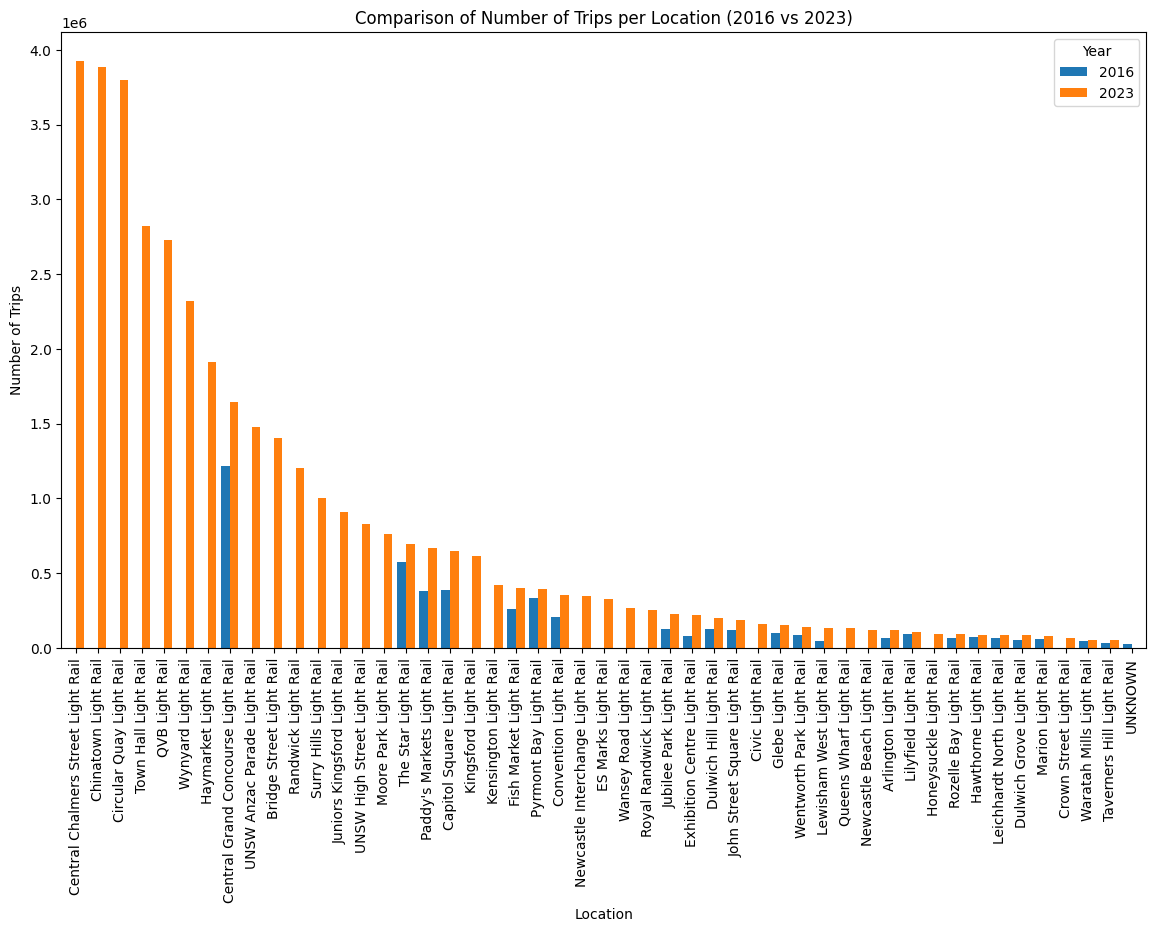

In [154]:
trips_comparison_stop('lightrail-may-2024.csv')

In [155]:
def plot_trips_comparison(file_path, year1='2020', year2='2023'):
    df = pd.read_csv(file_path)
    
    df['Year'] = df['Year_Month'].str[:4]
    df_year1 = df[df['Year'] == year1]
    df_year2 = df[df['Year'] == year2]
    
    trips_year1 = df_year1.groupby('Location')['Trip'].sum()
    trips_year2 = df_year2.groupby('Location')['Trip'].sum()
    
    trips_comparison = pd.DataFrame({
        year1: trips_year1,
        year2: trips_year2
    }).fillna(0)
    
    trips_comparison_sorted = trips_comparison.sort_values(by=year2, ascending=False)
    
    plt.figure(figsize=(14, 8))
    trips_comparison_sorted.plot(kind='bar', ax=plt.gca(), width=0.8)
    plt.title(f'Comparison of Number of Trips per Location ({year1} vs {year2})')
    plt.xlabel('Location')
    plt.ylabel('Number of Trips')
    plt.xticks(rotation=90)
    plt.legend(title='Year')


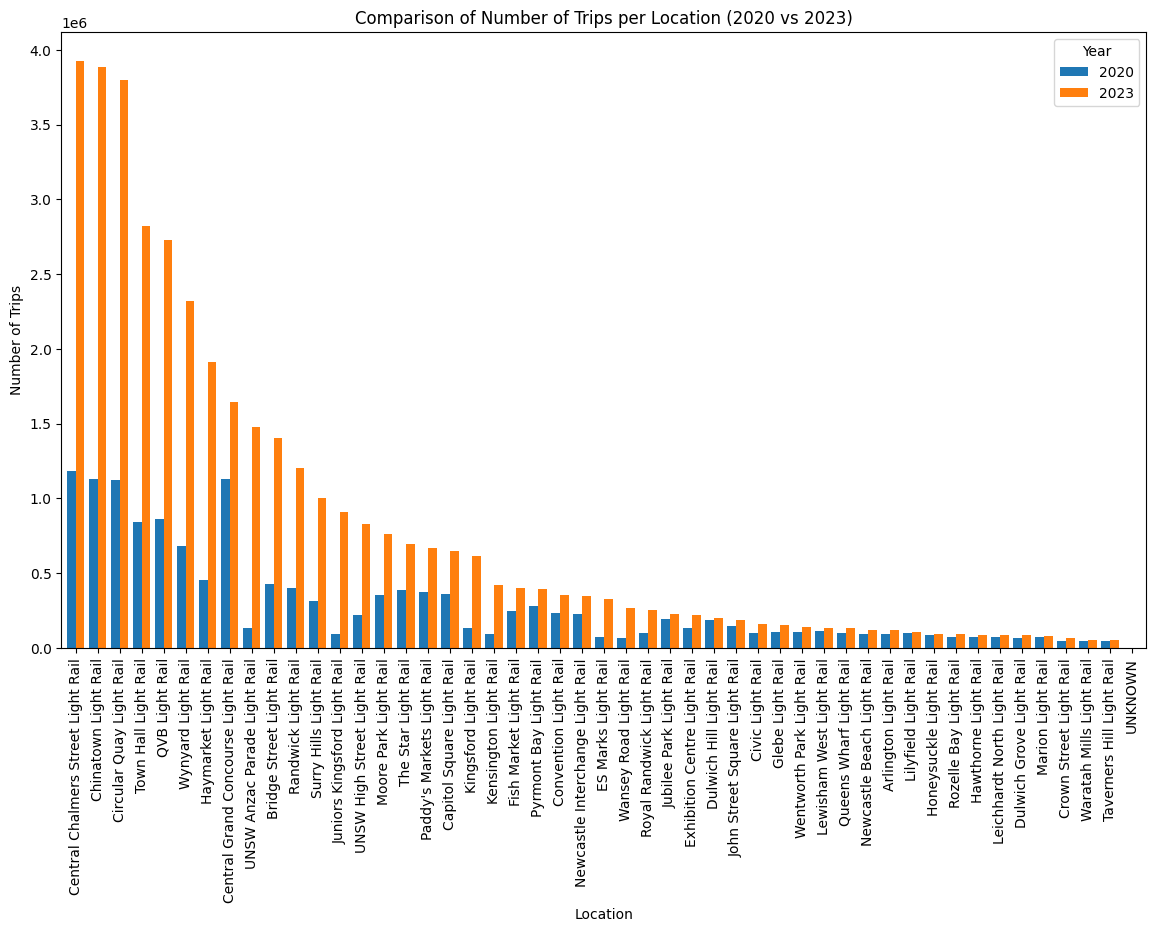

In [156]:
plot_trips_comparison('lightrail-may-2024.csv')

In [37]:
def plot_light_rail_stops(stop_data_path, trip_data_path, geojson_path, output_html='light_rail_stops_colored_map_bw.html'):

    stop_data = pd.read_csv(stop_data_path)
    trip_data = pd.read_csv(trip_data_path)
    
    def extract_coordinates(geometry):
        match = re.search(r'POINT \(([-\d.]+) ([-\d.]+)\)', geometry)
        if match:
            lon, lat = match.groups()
            return float(lat), float(lon)
        return None, None

    stop_data['Latitude'], stop_data['Longitude'] = zip(*stop_data['geometry'].apply(extract_coordinates))
    stop_data = stop_data.dropna(subset=['Latitude', 'Longitude'])

    trips_per_location = trip_data.groupby('Location')['Trip'].sum().reset_index()
    stop_data = pd.merge(stop_data, trips_per_location, left_on='stop_name', right_on='Location', how='left')

    colormap = linear.YlOrRd_09.scale(stop_data['Trip'].min(), stop_data['Trip'].max())

    center_lat = stop_data['Latitude'].mean()
    center_lon = stop_data['Longitude'].mean()
    mymap = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles='CartoDB positron')

    folium.GeoJson(geojson_path, style_function=lambda x: {'color': 'black', 'weight': 1}).add_to(mymap)

    for _, row in stop_data.iterrows():
        color = colormap(row['Trip'])
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"Stop: {row['stop_name']}<br>Trips: {row['Trip']}"
        ).add_to(mymap)

    colormap.add_to(mymap)

    mymap.save(output_html)

    return mymap


In [43]:
mymap = plot_light_rail_stops('stop_lookup.csv', 'lightrail-may-2024.csv', 'new-south-wales-australia_1303.geojson')
mymap


In [39]:
stops_path = r'C:\Users\konnm\1161\Rail_data\stop_lookup.csv'


In [40]:
df_geo = pd.read_csv(stops_path)

In [41]:
df_geo

,stop_name,geometry,address
0,Arlington Light Rail,POINT (151.1641936 -33.8742468),"Inner West Light Rail, City West Link Offramp,..."
1,Capitol Square Light Rail,POINT (-122.32030658760733 47.61963245),"Capitol Hill Light Rail Station, East John Str..."
2,Central Grand Concourse Light Rail,POINT EMPTY,NaN
3,Convention Light Rail,POINT (-92.09775753018387 46.78088665),"Duluth Entertainment Convention Center, Railro..."
4,Dulwich Grove Light Rail,POINT (151.1382753 -33.9049952),"Dulwich Grove Light Rail, New Canterbury Rd, N..."
5,Dulwich Hill Light Rail,POINT (151.1382753 -33.9049952),"Dulwich Grove Light Rail, New Canterbury Rd, N..."
6,Exhibition Centre Light Rail,POINT (-4.283497652057351 55.86150295),"Exhibition Centre Railway Station, Minerva Str..."
7,Fish Market Light Rail,POINT (151.1921126 -33.8704864),"Fish Market Light Rail, Miller St, Miller Stre..."
8,Glebe Light Rail,POINT (151.1641936 -33.8742468),"Inner West Light Rail, City West Link Offramp,..."
9,Hawthorne Light Rail,POINT (-2.5180242 51.8733449),"Lea Bailey Light Railway, Hawthorns Road, HR9 ..."
